**SALARY PREDICTION**

This model predicts the future salaries of employees.

In [4]:
#importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the datasets

In [ ]:
#loading the datasets from its path

train_features = pd.read_csv("train_features.csv")
train_salaries =pd.read_csv("train_salaries.csv")
test_features =pd.read_csv("test_features.csv")


Merge the training datasets

In [6]:
dataset_df = pd.merge(train_features,train_salaries,on="jobId")

**Data Discovery**

In [7]:
#previewing the first few rows
dataset_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
dataset_df.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999999,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


In [9]:
#discovering the shape of the dataset
dataset_df.shape

(1000000, 9)

In [10]:
#obtaining a concise summary of the dataset
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [11]:
#checking for missing values
dataset_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [12]:
#check if the missing values are encoded as 0
dataset_df.eq(0).sum()

jobId                      0
companyId                  0
jobType                    0
degree                     0
major                      0
industry                   0
yearsExperience        39839
milesFromMetropolis    10123
salary                     5
dtype: int64

Years of experience can be encoded as 0 if the the timeline is less than a year.
MilesFromMetropolis(which is distance to Metropolis) can be encoded as 0 if the distance is small.
Salary can be encoded as 0 if the staff is volunteering or there are missing values encoded as 0.


In [13]:
#does job type contain volunteering as a job type
print("job type values:",dataset_df.jobType.unique())

job type values: ['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']


In [14]:
#volunteering does not exist in the job description.Therefore ,we drop observations with salary as 0.
dataset_df.drop(dataset_df[dataset_df.salary==0].index,inplace=True)

In [15]:
#statistical description of the numeric objects in the dataframe
#The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
dataset_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [16]:
#checking for duplicate jobId rows as jobID should be unique for everyone in the organisation.
dataset_df_no_duplicates=dataset_df.drop('jobId',axis=1).drop_duplicates()
print(dataset_df)
print(dataset_df_no_duplicates)

                   jobId companyId  ... milesFromMetropolis salary
0       JOB1362684407687    COMP37  ...                  83    130
1       JOB1362684407688    COMP19  ...                  73    101
2       JOB1362684407689    COMP52  ...                  38    137
3       JOB1362684407690    COMP38  ...                  17    142
4       JOB1362684407691     COMP7  ...                  16    163
...                  ...       ...  ...                 ...    ...
999995  JOB1362685407682    COMP56  ...                  94     88
999996  JOB1362685407683    COMP24  ...                  35    160
999997  JOB1362685407684    COMP23  ...                  81     64
999998  JOB1362685407685     COMP3  ...                   5    149
999999  JOB1362685407686    COMP59  ...                  11     88

[999995 rows x 9 columns]
       companyId         jobType  ... milesFromMetropolis salary
0         COMP37             CFO  ...                  83    130
1         COMP19             CEO  ...  

In [17]:
dataset_df =dataset_df_no_duplicates
dataset_df.shape

(999809, 8)

Text(0.5, 1.0, 'Salary Outliers')

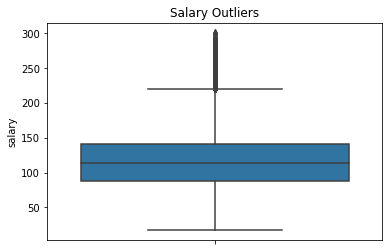

In [18]:
#obtaining a boxplot for the salary distribution
import seaborn as sns
sns.boxplot(y=dataset_df["salary"]).set_title("Salary Outliers")

A boxplot can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [19]:
#checking the symmetry of the data distribution
dataset_df["salary"].skew()

0.3466137670165424

In [20]:
#Kurtosis is the degree of peakedness of a distribution
dataset_df["salary"].kurtosis()


-0.02566650565198003

The distribution is relatively symmetrical and the outliers are relatively small.Therefore,there might be no need for the removal of the outliers.

**Exploratory Data Analysis**

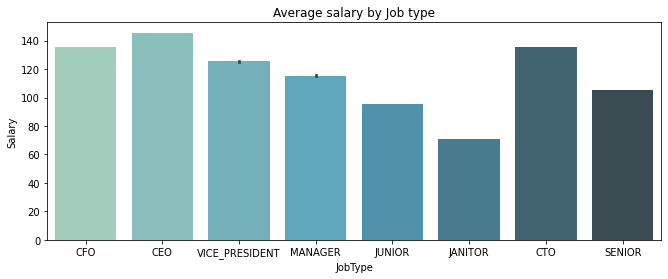

In [21]:
#exploring the salary across various groups
#jobtype vs salary
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df["jobType"],y=dataset_df["salary"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("JobType")
plt.ylabel("Salary")
plt.title("Average salary by Job type")
plt.show()

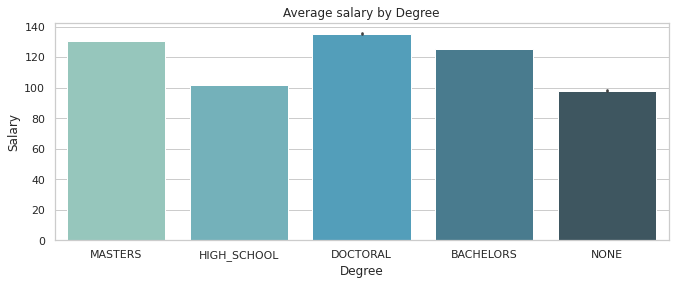

In [22]:
#degree vs salary
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df["degree"],y=dataset_df["salary"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.title("Average salary by Degree")
plt.show()


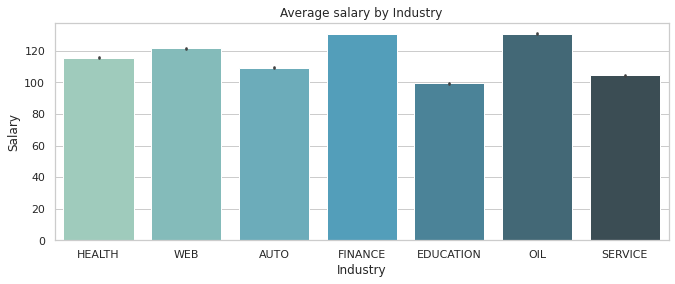

In [23]:
#industry vs salary
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df["industry"],y=dataset_df["salary"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("Industry")
plt.ylabel("Salary")
plt.title("Average salary by Industry")
plt.show()


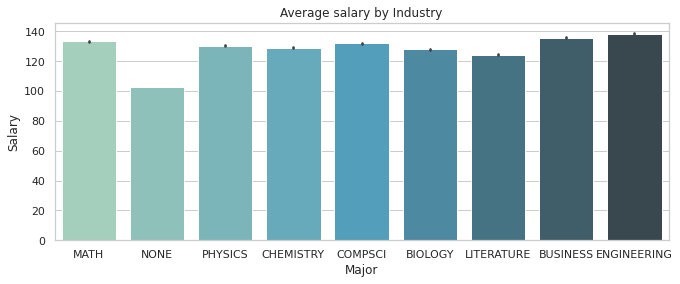

In [24]:
#major vs salary
plt.figure(figsize =(11,4))
sns.barplot(x=dataset_df["major"],y=dataset_df["salary"],palette=("GnBu_d"))
sns.set(style="whitegrid")
plt.xlabel("Major")
plt.ylabel("Salary")
plt.title("Average salary by Industry")
plt.show()

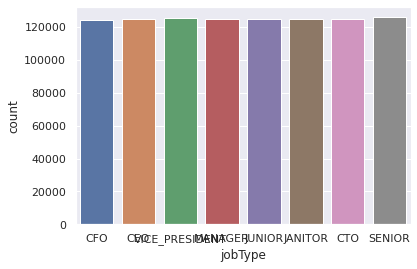

In [25]:
sns.set(style ="darkgrid")

sns.countplot(x='jobType',data=dataset_df)
plt.xlabel("jobType")

plt.show()

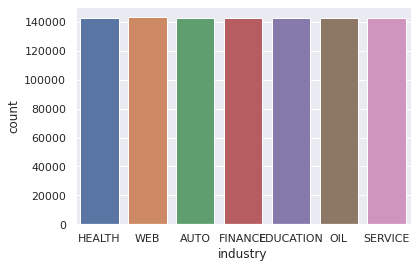

In [26]:
sns.set(style ="darkgrid")

sns.countplot(x='industry',data=dataset_df)
plt.xlabel("industry")

plt.show()

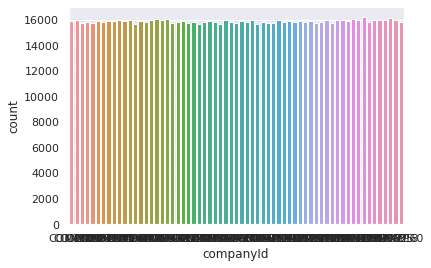

In [27]:
sns.set(style ="darkgrid")

sns.countplot(x='companyId',data=dataset_df)
plt.xlabel("companyId")

plt.show()

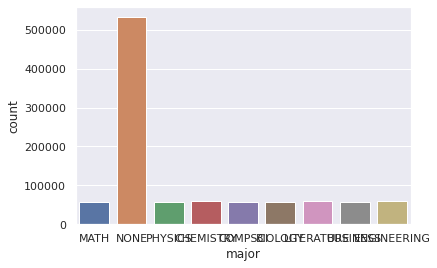

In [28]:
sns.set(style ="darkgrid")

sns.countplot(x='major',data=dataset_df)
plt.xlabel("major")

plt.show()

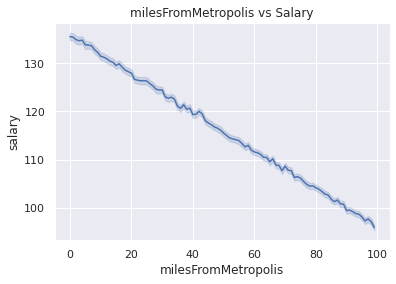

In [29]:
#drawing lineplots to show the linearity of the distribution
sns.lineplot(x=dataset_df['milesFromMetropolis'],y=dataset_df['salary'],data=dataset_df)
plt.title("milesFromMetropolis vs Salary")
plt.show()

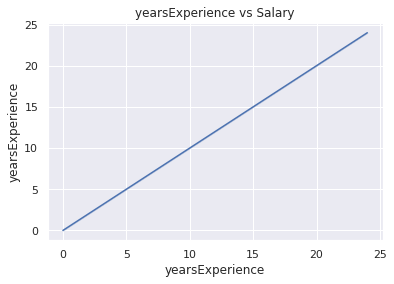

In [30]:
sns.lineplot(x=dataset_df['yearsExperience'],y=dataset_df['yearsExperience'],data=dataset_df)
plt.title("yearsExperience vs Salary")
plt.show()

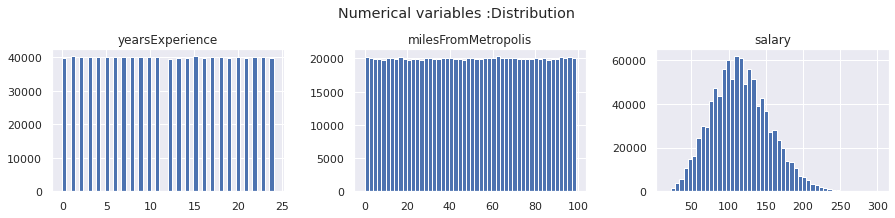

In [31]:
#exploring the distribution of the numerical variables
num =dataset_df.select_dtypes(include=[np.int64])
num.hist(bins=50,figsize=(15,6),layout=(2,3))
plt.suptitle("Numerical variables :Distribution")
plt.show()

No handles with labels found to put in legend.


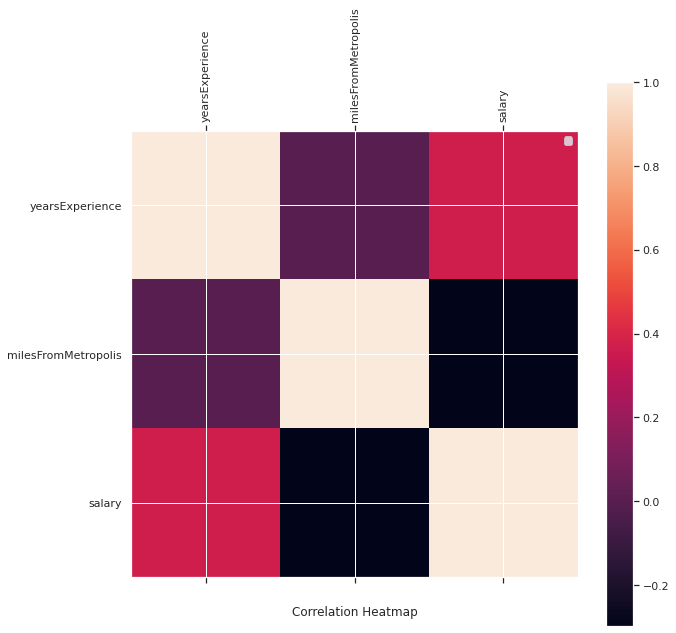

In [32]:
#The correlation matrix basically shows the correlation betwen the variables.Each cell shows the correlation between two variables.
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Heatmap",y=-0.1)
plot_corr(dataset_df)

**Data Preparation/Preprocessing**

In [33]:
#perform One-Hot-Encoding on Categorical Data
import pandas as pd

categorial = ['companyId','jobType','degree','major','industry']
dataset_df= pd.get_dummies(dataset_df, columns=categorial, drop_first=True)

dataset_df.head()


,yearsExperience,milesFromMetropolis,salary,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,companyId_COMP18,companyId_COMP19,companyId_COMP2,companyId_COMP20,companyId_COMP21,companyId_COMP22,companyId_COMP23,companyId_COMP24,companyId_COMP25,companyId_COMP26,companyId_COMP27,companyId_COMP28,companyId_COMP29,companyId_COMP3,companyId_COMP30,companyId_COMP31,companyId_COMP32,companyId_COMP33,companyId_COMP34,companyId_COMP35,companyId_COMP36,companyId_COMP37,companyId_COMP38,companyId_COMP39,companyId_COMP4,companyId_COMP40,companyId_COMP41,companyId_COMP42,...,companyId_COMP52,companyId_COMP53,companyId_COMP54,companyId_COMP55,companyId_COMP56,companyId_COMP57,companyId_COMP58,companyId_COMP59,companyId_COMP6,companyId_COMP60,companyId_COMP61,companyId_COMP62,companyId_COMP7,companyId_COMP8,companyId_COMP9,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [34]:
#identify the feature and target values
target_value=dataset_df['salary']
feature_value=dataset_df.drop(['salary'],axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler
#feature scaling_standardization
scaler = StandardScaler()
feature_value = scaler.fit_transform(feature_value)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(feature_value,target_value,test_size =0.30)
#split the dataset into train and test data 
#x_train represents the feature value of training data
#x_val represents the feature value of validation test data
#y_train represents the target value of training data
#y_test represents the target value of validation test data

**Develop A Baseline Model**

A baseline result is the simplest possible prediction.Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case, lets predict the salary as the overall average salary.The baseline model of choice here is Linear Regression.

**Building the choice models**

In [37]:
from sklearn import  metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def modelfit(alg,features,target):
    #Fit the algorithm on the data
    alg.fit(features, target)
        
    #Predict training set:
    predictions = alg.predict(features)

    #Perform cross-validation:
    cv_score = cross_val_score(alg,features, target, cv=5, scoring="neg_mean_squared_error")
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(target.values,predictions)))
    #print ("RMSE : %.4g" %metrics.mean_squared_error(target.values,predictions))
    print ( "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
   

In [38]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression(normalize=True)
modelfit(alg1,feature_value,target_value)



Model Report
RMSE : 19.61
CV Score : Mean - 19.61 | Std - 0.04455 | Min - 19.55 | Max - 19.66


In [39]:
from sklearn import tree
alg2=tree.DecisionTreeRegressor()
modelfit(alg2,feature_value,target_value)


Model Report
RMSE : 1.432
CV Score : Mean - 26.56 | Std - 0.05951 | Min - 26.48 | Max - 26.63


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
alg3 =GradientBoostingRegressor(n_estimators=150,max_depth=5)
modelfit(alg3,feature_value,target_value)


Model Report
RMSE : 18.93
CV Score : Mean - 18.98 | Std - 0.03998 | Min - 18.92 | Max - 19.02


**Deploy**

In [46]:
import joblib
joblib_file ="gb_salary_model.pk1"
joblib.dump(alg3,joblib_file)

#loading the saved model
models=joblib.load("gb_salary_model.pk1")


In [42]:
#checking for duplicate jobId rows as jobID should be unique for everyone in the organisation.
test_df_no_duplicates=test_features.drop('jobId',axis=1).drop_duplicates()
print(test_features)
print(test_df_no_duplicates)

                   jobId companyId  ... yearsExperience milesFromMetropolis
0       JOB1362685407687    COMP33  ...              22                  73
1       JOB1362685407688    COMP13  ...              20                  47
2       JOB1362685407689    COMP10  ...              17                   9
3       JOB1362685407690    COMP21  ...              14                  96
4       JOB1362685407691    COMP36  ...              10                  44
...                  ...       ...  ...             ...                 ...
999995  JOB1362686407682    COMP54  ...              14                   3
999996  JOB1362686407683     COMP5  ...              20                  67
999997  JOB1362686407684    COMP61  ...               1                  91
999998  JOB1362686407685    COMP19  ...              14                  63
999999  JOB1362686407686    COMP34  ...              16                  31

[1000000 rows x 8 columns]
       companyId         jobType  ... yearsExperience milesF

In [43]:
df_test=test_df_no_duplicates

In [44]:
#one hot encoding
import pandas as pd

categorial = ['companyId','jobType','degree','major','industry']
df_test= pd.get_dummies(df_test, columns=categorial, drop_first=True)

df_test.head()


,yearsExperience,milesFromMetropolis,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,companyId_COMP18,companyId_COMP19,companyId_COMP2,companyId_COMP20,companyId_COMP21,companyId_COMP22,companyId_COMP23,companyId_COMP24,companyId_COMP25,companyId_COMP26,companyId_COMP27,companyId_COMP28,companyId_COMP29,companyId_COMP3,companyId_COMP30,companyId_COMP31,companyId_COMP32,companyId_COMP33,companyId_COMP34,companyId_COMP35,companyId_COMP36,companyId_COMP37,companyId_COMP38,companyId_COMP39,companyId_COMP4,companyId_COMP40,companyId_COMP41,companyId_COMP42,companyId_COMP43,...,companyId_COMP52,companyId_COMP53,companyId_COMP54,companyId_COMP55,companyId_COMP56,companyId_COMP57,companyId_COMP58,companyId_COMP59,companyId_COMP6,companyId_COMP60,companyId_COMP61,companyId_COMP62,companyId_COMP7,companyId_COMP8,companyId_COMP9,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,20,47,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,17,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,10,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
#scoring the test dataset
salary_predictions =models.predict(df_test)

#saving the predictions
np.savetxt('salary_predictions.csv',salary_predictions,delimiter=',')

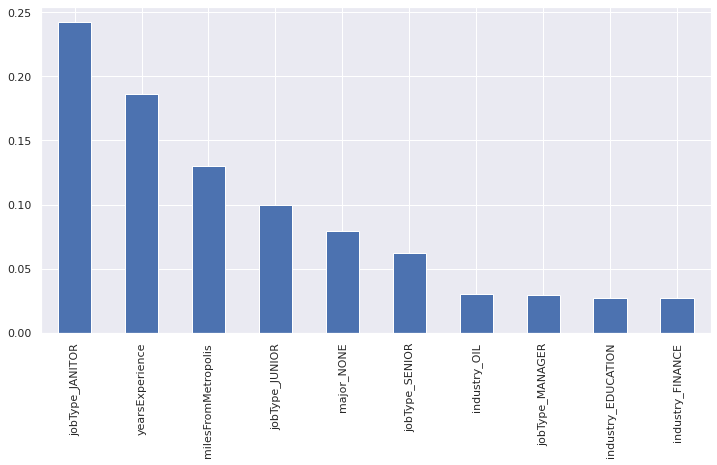

In [50]:
#showing feature importance
importances=pd.Series(models.feature_importances_,index=df_test.columns)
importances.nlargest(10).plot(kind='bar',figsize=(12,6))
plt.show()

#saving feature importances
np.savetxt('salary_importances.csv',importances,delimiter=',')